## **Ex.1 - Loading the dataset**

In [ ]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<hr>

Splitting the data into 70% training and 30% test subsets.

In [ ]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

Standardizing the data.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## **Ex.2 - Principal component analysis in scikit-learn**

### Part 1 - *Perform PCA and present the explained variance ratio* (check https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Perform the transformation on test data and plot the first two principal components.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train_std)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)
print(pca.explained_variance_ratio_)

[0.36251814 0.22827027]


In [ ]:
import matplotlib.pyplot as plt

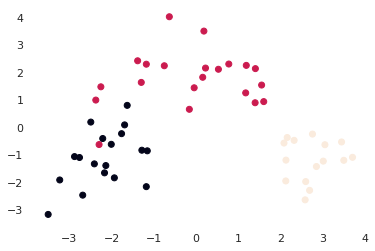

In [67]:
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test )
plt.show()


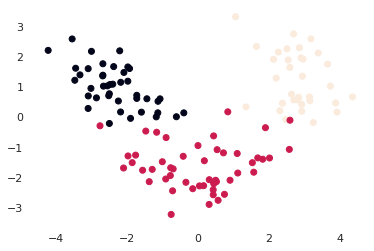

In [68]:
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train)
plt.show()

### Part 2 - *Training logistic regression classifier using the first 2 principal components*. Using a cross-validation procedure (check https://scikit-learn.org/stable/modules/cross_validation.html), select the best C parameter for the logistic regression with the first two principal components. Repeat the same procedure for the dataset with all the original features. Compare the results in terms of accuracy and confusion matrix. Present the conclusions.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)
clf_pca = LogisticRegression().fit(X_train_pca, y_train)

In [ ]:
pred = clf_pca.predict(X_test_pca)
accuracy_score(y_test, pred)            #????

0.6666666666666666

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:

l_1 = []
l_2 = []
for i in range(1,100):
  clf_pca2 = LogisticRegression(C=i).fit(X_train_pca, y_train)
  scores1 = cross_val_score(clf_pca2, X_train_pca, y_train, cv=10)
  scores2 = cross_val_score(clf_pca2, X_test_pca, y_test, cv=10)
  l_1.append(scores1)
  l_2.append(scores2)


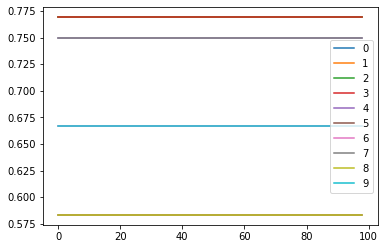

In [ ]:
import pandas as pd
df = pd.DataFrame(l_1)
df.plot()
plt.show()
#10 folds c de 0 a 100 traino

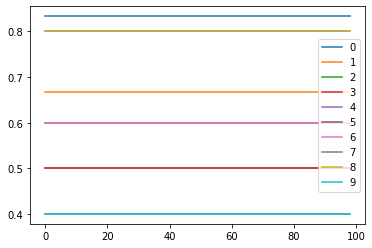

In [ ]:
import pandas as pd
df = pd.DataFrame(l_2)
df.plot()
plt.show()
#10 folds c de 0 a 100 teste

In [ ]:
clf = LogisticRegression().fit(X_train, y_train)
pred = clf.predict(X_test)
print(accuracy_score(y_test, pred))

0.9444444444444444


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
l_1 = []
l_2 = []
for i in range(1,100):
  clf = LogisticRegression(C=i).fit(X_train, y_train)
  scores1 = cross_val_score(clf, X_train, y_train, cv=10)
  scores2 = cross_val_score(clf, X_test, y_test, cv=10)
  l_1.append(scores1)
  l_2.append(scores2)

A saída de streaming foi truncada nas últimas 5000 linhas.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

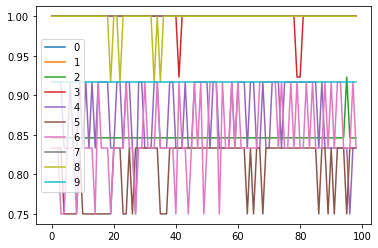

In [ ]:
import pandas as pd
df = pd.DataFrame(l_1)
df.plot()
plt.show()
#10 folds variando c de 0 a 100 traino

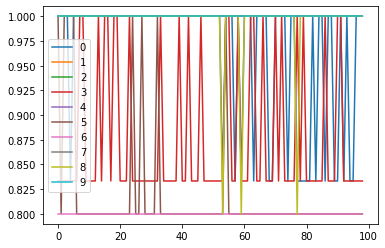

In [ ]:
import pandas as pd
df = pd.DataFrame(l_2)
df.plot()
plt.show()
#10 folds variando c de 0 a 100 teste

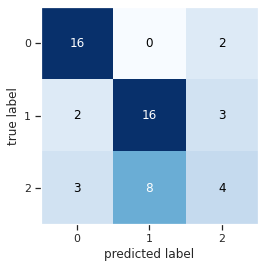

In [ ]:
import seaborn as sns; 
from mlxtend.evaluate import confusion_matrix

clf = LogisticRegression().fit(X_train_pca, y_train)
pred = clf.predict(X_test_pca)

y_target =    y_test
y_predicted = pred

cm = confusion_matrix(y_target=y_target, 
                      y_predicted=y_predicted)
cm
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


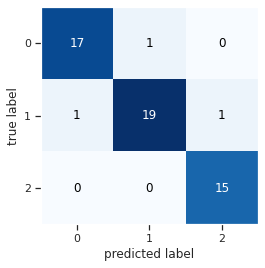

In [ ]:
import seaborn as sns; 
from mlxtend.evaluate import confusion_matrix

clf = LogisticRegression().fit(X_train, y_train)
pred = clf.predict(X_test)

y_target =    y_test
y_predicted = pred

cm = confusion_matrix(y_target=y_target, 
                      y_predicted=y_predicted)
cm
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

Ainda falta comentar os resultados!